<h2 align="center">KNN Algorithm</h2>

#### Intro

KNN is a **non-parametric** and **lazy learning** algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

#### How does the KNN algorithm work?

<img src="KNN.png">
In KNN,K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.<br>
Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:<br>
1.calculating distance<br>
2.Finding closest neighburs<br>
3.Vote for Labels

<img src="KNN2.png">

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

# For Example 1.0
df = pd.read_csv("Classified Data",index_col=0)
df.head()

# For Example 2.0
# df=datasets.load_wine()
# df.keys()
# df.feature_names
# df.target_names


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### Train Test Split

In [3]:
# For Example 1.0
x=df.drop(labels=['TARGET CLASS'],axis=1)
y=df['TARGET CLASS']
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42,stratify=y)

# For Example 2.0
# x=df.data
# y=df.target
# x.shape,y.shape
# X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42,stratify=y)


#### Plotting Pairplot how the datapoints of different Target Class(0 and 1) is Distributed

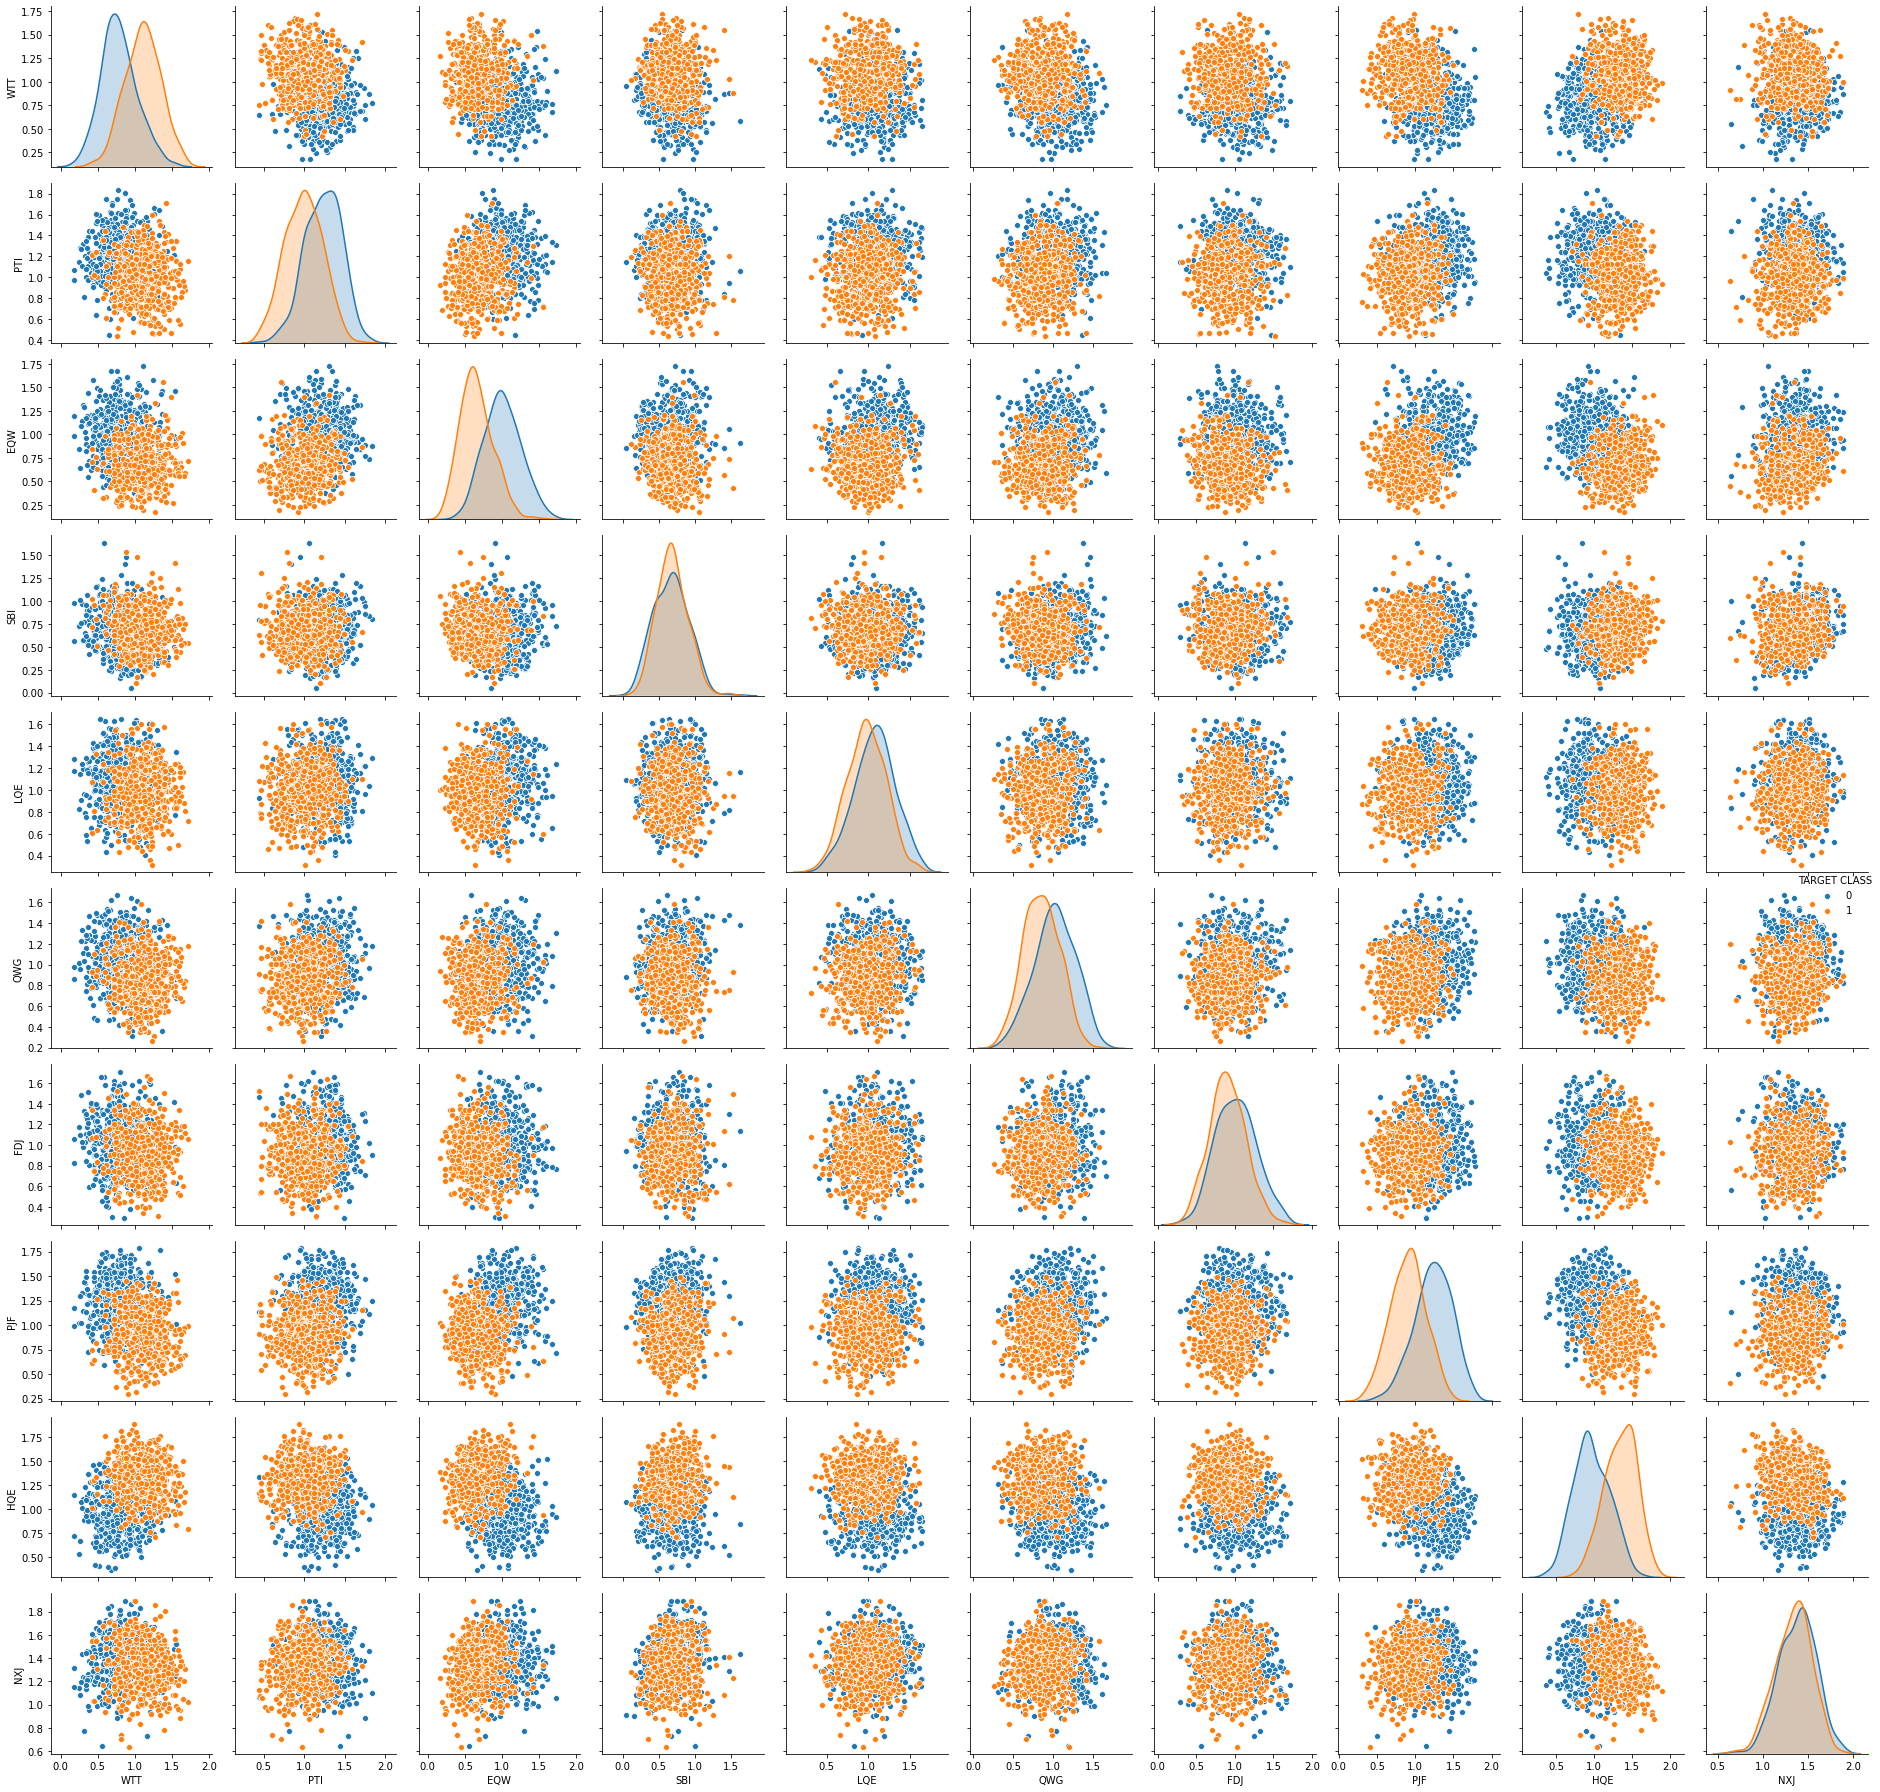

In [4]:
# Valid For Example 1.0 only as it has DataFrame and ex 2.0 doesnot
sns.pairplot(df,hue='TARGET CLASS')  # Shows how the data points exists is an unclassified manner
plt.tight_layout() 

### Generating Model for K=3

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict=knn.predict(x_test)
y_predict
print('Model Accuracy for K=3:',knn.score(x_test,y_test)*100,'%')
print('Model Accuracy for K=3:',metrics.accuracy_score(y_test,y_predict)*100,'%')

Model Accuracy for K=3: 90.9090909090909 %
Model Accuracy for K=3: 90.9090909090909 %


### Generating Model for K=5

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_predict=knn.predict(x_test)
y_predict
print('Model Accuracy for K=5 :',knn.score(x_test,y_test)*100,'%')

Model Accuracy for K=5 : 91.51515151515152 %


### Generating Model for K=7

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_predict=knn.predict(x_test)
y_predict
print('Model Accuracy for K=7:',metrics.accuracy_score(y_test,y_predict)*100,'%')

Model Accuracy for K=7: 92.12121212121212 %


### Determining Optimum number of Neighbourhoods(K) and Best Accuracy

#### Using Standardization

Standardization is useful to achieve higher accuracy in those classification problems that uses distance parameters. KNN or SVM deals with the distance so in those algoithm standardization is very helpful.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
#x_scaled


In [10]:
X_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=42,stratify=y)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_predict=knn.predict(x_test)
y_predict
print('Model Accuracy after Standardization :',metrics.accuracy_score(y_test,y_predict)*100,'%')

Model Accuracy after Standardization : 91.81818181818183 %


#### METHOD 1:  Using cross-validation to choose the number of neighbours(K) for better accuracy

In [11]:
from sklearn.model_selection import cross_val_score
neighbors=list(range(1,100,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_scaled,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())


In [12]:
# Making a Dataframe containing the K values and corresponding accuracy
KvsMSE={"K value": list(neighbors),
         "Accuracy": cv_scores}
Kdf=pd.DataFrame(KvsMSE)
#Kdf


In [13]:
# To determine at what K value accuracy is maximum
filt=Kdf.Accuracy==Kdf["Accuracy"].max()
Kdf.loc[filt]

,K value,Accuracy
21,43,0.942
22,45,0.942
24,49,0.942
26,53,0.942
27,55,0.942
33,67,0.942
34,69,0.942


In [14]:
MSE=[1-x for x in cv_scores]
MSE
optimal_k=neighbors[MSE.index(min(MSE))]
print('Optimal Value of K for Maximum Accuracy of the model :', optimal_k)

Optimal Value of K for Maximum Accuracy of the model : 43


#### METHOD 2:  Determining Optimal K from Elbow curve

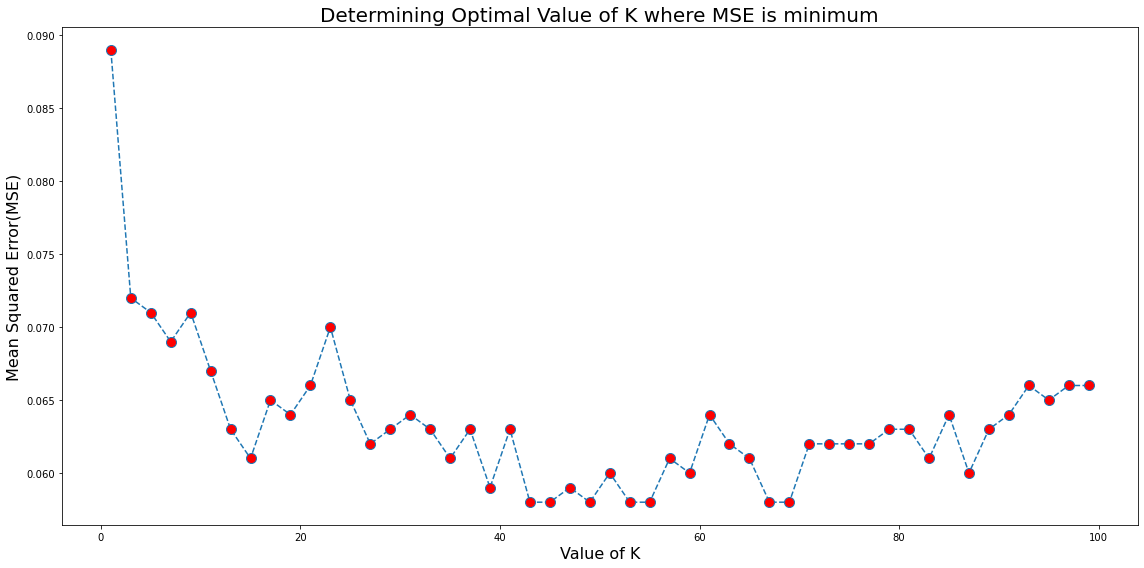

In [15]:
plt.figure(figsize=(16,8))
plt.plot(neighbors,MSE,marker='o',markerfacecolor='r',markersize=10,linestyle='dashed')
plt.title('Determining Optimal Value of K where MSE is minimum',fontsize=20)
plt.xlabel('Value of K',fontsize=16)
plt.ylabel('Mean Squared Error(MSE)',fontsize=16)
plt.tight_layout()

#### METHOD 4: Using GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,100,2)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
X=df.drop('TARGET CLASS',axis=1).values
y = df['TARGET CLASS'].values
knn_cv.fit(X,y)
print("The optimum value of Neighbpurhood(K) :",knn_cv.best_params_)
print("The Optimum Model Accuracy :",knn_cv.best_score_*100)

The optimum value of Neighbpurhood(K) : {'n_neighbors': 33}
The Optimum Model Accuracy : 94.19999999999999


### Generating Model for K = Optimal_Value

In [17]:
# X_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=42,stratify=y)
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# knn=KNeighborsClassifier(n_neighbors=49)
# knn.fit(X_train,y_train)
# y_predict=knn.predict(x_test)
# y_predict
# print('Model Accuracy after Standardization and at Optimal K :',metrics.accuracy_score(y_test,y_predict)*100,'%')

<h2 align="center"> Notes</h2>

#### Eager Vs. Lazy Learners


Eager learners mean when given training points will construct a generalized model before performing prediction on given new points to classify. You can think of such learners as being ready, active and eager to classify unobserved data points.

Lazy Learning means there is no need for learning or training of the model and all of the data points used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. Lazy learner stores merely the training dataset and waits until classification needs to perform. Only when it sees the test tuple does it perform generalization to classify the tuple based on its similarity to the stored training tuples. Unlike eager learning methods, lazy learners do less work in the training phase and more work in the testing phase to make a classification. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.



#### Curse of Dimensionality


KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

#### How do you decide the number of neighbors in KNN?

The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.

Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.

<img src="KNN3.png">

### Advantages and Disadvantages

**Pros**<br>
The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

**Cons**<br>
The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.